In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
#dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

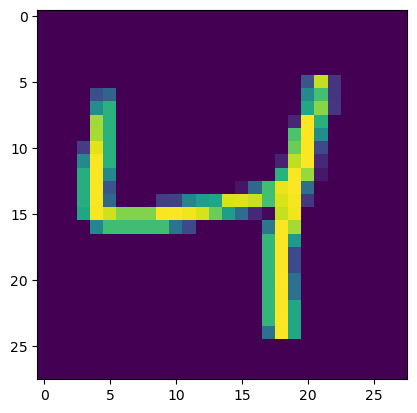

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [9]:
#Pre Process the data
#Normalizing the image
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
#model
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
#Model Training
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 189s 43ms/step - loss: 0.2831 - accuracy: 0.9185 - val_loss: 0.1375 - val_accuracy: 0.9596
Epoch 2/25
1500/1500 [==============================] - 31s 21ms/step - loss: 0.1160 - accuracy: 0.9656 - val_loss: 0.1075 - val_accuracy: 0.9674
Epoch 3/25
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0821 - accuracy: 0.9749 - val_loss: 0.1009 - val_accuracy: 0.9694
Epoch 4/25
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0631 - accuracy: 0.9798 - val_loss: 0.1041 - val_accuracy: 0.9696
Epoch 5/25
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0494 - accuracy: 0.9844 - val_loss: 0.1045 - val_accuracy: 0.9697
Epoch 6/25
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0394 - accuracy: 0.9873 - val_loss: 0.1104 - val_accuracy: 0.9696
Epoch 7/25
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0320 - accuracy: 0.9893 - val_loss: 0.1092 

In [15]:
#Prediction
y_prob = model.predict(X_test)

313/313 [==============================] - 14s 19ms/step


In [16]:
y_pred = y_prob.argmax(axis=1)

In [17]:
#Performance
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9755

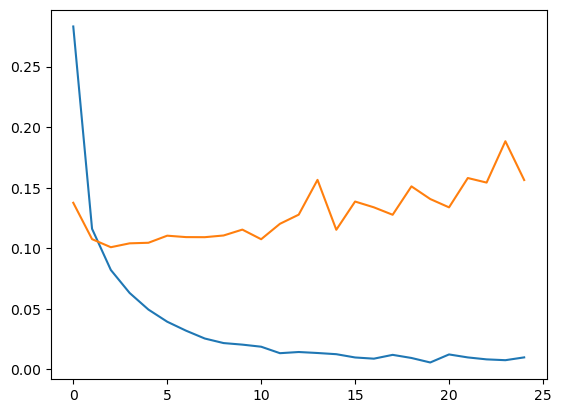

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

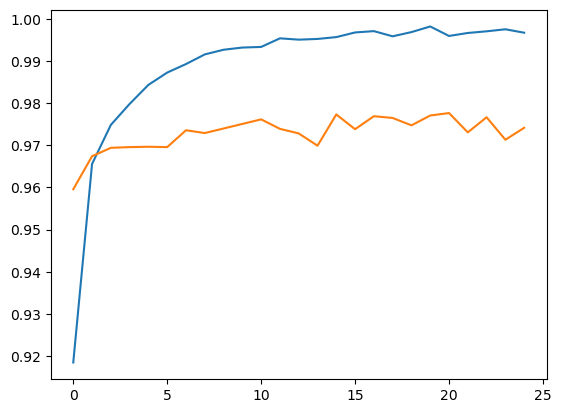

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

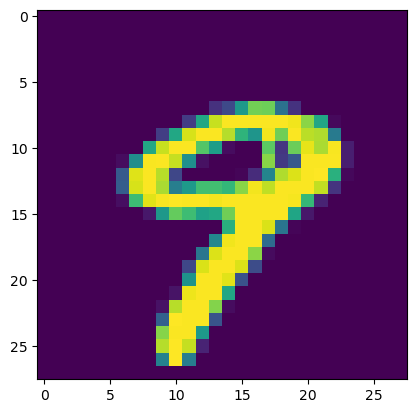

In [23]:
plt.imshow(X_test[9])

In [25]:
#Testing
model.predict(X_test[9].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 130ms/step


array([9], dtype=int64)